In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
#read the dataset
df = pd.read_csv("/content/yahoofinance.csv")

In [ ]:
print(df.head)

<bound method NDFrame.head of            Date        Open        High         Low       Close   Adj Close  \
0    2019-03-25  191.509995  191.979996  186.600006  188.740005  186.301483   
1    2019-03-26  191.660004  192.880005  184.580002  186.789993  184.376678   
2    2019-03-27  188.750000  189.759995  186.550003  188.470001  186.034973   
3    2019-03-28  188.949997  189.559998  187.529999  188.720001  186.281738   
4    2019-03-29  189.830002  190.080002  188.539993  189.949997  187.495865   
..          ...         ...         ...         ...         ...         ...   
248  2020-03-18  239.770004  250.000000  237.119995  246.669998  246.669998   
249  2020-03-19  247.389999  252.839996  242.610001  244.779999  244.779999   
250  2020-03-20  247.179993  251.830002  228.000000  229.240005  229.240005   
251  2020-03-23  228.080002  228.500000  212.610001  224.369995  224.369995   
252  2020-03-24  236.360001  243.440002  234.300003  242.490005  242.490005   

        Volume  
0   

In [ ]:
df.info

<bound method DataFrame.info of            Date        Open        High         Low       Close   Adj Close  \
0    2019-03-25  191.509995  191.979996  186.600006  188.740005  186.301483   
1    2019-03-26  191.660004  192.880005  184.580002  186.789993  184.376678   
2    2019-03-27  188.750000  189.759995  186.550003  188.470001  186.034973   
3    2019-03-28  188.949997  189.559998  187.529999  188.720001  186.281738   
4    2019-03-29  189.830002  190.080002  188.539993  189.949997  187.495865   
..          ...         ...         ...         ...         ...         ...   
248  2020-03-18  239.770004  250.000000  237.119995  246.669998  246.669998   
249  2020-03-19  247.389999  252.839996  242.610001  244.779999  244.779999   
250  2020-03-20  247.179993  251.830002  228.000000  229.240005  229.240005   
251  2020-03-23  228.080002  228.500000  212.610001  224.369995  224.369995   
252  2020-03-24  236.360001  243.440002  234.300003  242.490005  242.490005   

        Volume  
0     43845300  
1     49800500  
2     29848400  
3     20780400  
4     23564000  
..         ...  
248   75058400  
249   67964300  
250  100423300  
251   83889900  
252   20853932  

[253 rows x 7 columns]>

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,236.844229,239.629328,234.602332,237.338498,236.091135,3.164449e+07
std,43.534331,44.316390,43.064055,43.892846,44.482641,1.677487e+07
min,175.440002,177.919998,170.270004,173.300003,171.719727,1.136200e+07
25%,201.410004,203.529999,199.669998,201.750000,200.239075,2.114340e+07
50%,220.539993,222.490005,217.649994,220.699997,219.518402,2.655100e+07
75%,267.480011,271.000000,265.390015,268.480011,267.844330,3.480580e+07
max,324.739990,327.850006,323.350006,327.200012,327.200012,1.067212e+08


In [ ]:
apple_training = df.iloc[:,1:2].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
#minmax scaler
minmax = MinMaxScaler(feature_range=(0,1))
apple_processed = minmax.fit_transform(apple_training)

In [ ]:
#create the feature set with labels as output
feature_set=[]
labels=[]
for i in range(60,253):
  feature_set.append(apple_processed[i-60:i,0])
  labels.append(apple_processed[i,0])

In [ ]:
feature_set, labels = np.array(feature_set), np.array(labels)

In [ ]:
feature_set.shape

(193, 60)

In [ ]:
feature_set = np.reshape(feature_set, (feature_set.shape[0], feature_set.shape[1], 1))

In [ ]:
#Building the LSTM model
feature_set.shape

(193, 60, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [ ]:
model=Sequential()


In [ ]:
model.add(LSTM(units=60, return_sequences=True, input_shape=(feature_set.shape[1],1)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.add(Dropout(0.20))

In [ ]:
model.add(LSTM(units=60, return_sequences=True))
model.add(Dropout(0.20))

In [ ]:
model.add(LSTM(units=60, return_sequences=True))
model.add(Dropout(0.20))

In [ ]:
model.add(LSTM(units=60))
model.add(Dropout(0.20))

In [ ]:
model.add(Dense(units=1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
model.fit(feature_set,labels,epochs=100,batch_size=32)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - loss: 0.1578
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - loss: 0.0397
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - loss: 0.0246
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - loss: 0.0261
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 175ms/step - loss: 0.0235
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 178ms/step - loss: 0.0199
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - loss: 0.0168
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 0.0143
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - loss: 0.0145
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 0.0126
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - loss: 0.0152
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - loss: 0.0129
Epoch 13/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - loss: 0.0123
Epoch 14/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - loss: 0.0124
Epoch 15/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - loss: 0.0122
Epoc

In [ ]:
testing_data=df.iloc[:,1:2].values
test_feature = testing_data

In [ ]:
test_feature = test_feature.reshape(-1,1)
test_feature = minmax.transform(test_feature)

In [ ]:
testing_features = []
for i in range(60,253):
  testing_features.append(test_feature[i-60:i,0])

In [ ]:
testing_features = np.array(testing_features)

In [ ]:
testing_features = np.reshape(testing_features, (testing_features.shape[0], testing_features.shape[1], 1))

In [ ]:
predictions = model.predict(testing_features)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [ ]:
predictions

array([[0.06205454],
       [0.07314437],
       [0.0846767 ],
       [0.09636246],
       [0.10785924],
       [0.11882415],
       [0.12893023],
       [0.13804026],
       [0.14604485],
       [0.15309206],
       [0.1593141 ],
       [0.16489601],
       [0.17      ],
       [0.17461042],
       [0.17857204],
       [0.18185307],
       [0.18456246],
       [0.18680629],
       [0.18875024],
       [0.19056919],
       [0.19236529],
       [0.19417658],
       [0.1960811 ],
       [0.19803219],
       [0.2001646 ],
       [0.20258643],
       [0.20539495],
       [0.20855357],
       [0.21199103],
       [0.21562135],
       [0.21971469],
       [0.22443184],
       [0.2293697 ],
       [0.23361133],
       [0.23622473],
       [0.23654754],
       [0.23453857],
       [0.23058116],
       [0.22516592],
       [0.21887349],
       [0.21235852],
       [0.20620641],
       [0.20088671],
       [0.19699745],
       [0.19500127],
       [0.19520745],
       [0.1976833 ],
       [0.202

In [ ]:
predictions = minmax.inverse_transform(predictions)

In [ ]:
predictions

array([[184.70474],
       [186.36046],
       [188.08223],
       [189.82692],
       [191.5434 ],
       [193.18045],
       [194.68929],
       [196.04941],
       [197.2445 ],
       [198.29665],
       [199.22559],
       [200.05898],
       [200.821  ],
       [201.50934],
       [202.10081],
       [202.59067],
       [202.99518],
       [203.33017],
       [203.6204 ],
       [203.89198],
       [204.16014],
       [204.43057],
       [204.7149 ],
       [205.00621],
       [205.32457],
       [205.68616],
       [206.10545],
       [206.57706],
       [207.09026],
       [207.63228],
       [208.24341],
       [208.94766],
       [209.68489],
       [210.31818],
       [210.70834],
       [210.75655],
       [210.45662],
       [209.86577],
       [209.05727],
       [208.11781],
       [207.14513],
       [206.22661],
       [205.43239],
       [204.85172],
       [204.5537 ],
       [204.58446],
       [204.95412],
       [205.6088 ],
       [206.43845],
       [207.3403 ],


In [ ]:
# drop out layer -> smooth output curve
# when sequence of values are there use LSTM

In [ ]:
# add extra 60 zeros in starting 
predictions = np.concatenate((np.zeros((60,1)),predictions))

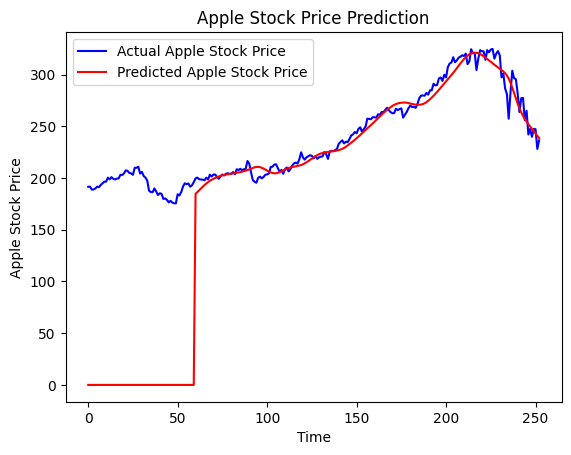

In [ ]:
plt.figure()
plt.plot(testing_data, color='blue', label='Actual Apple Stock Price')
plt.plot(predictions, color='red', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()